In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("/content/Train.csv")
df=df.iloc[:100]

In [12]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
95,463845,Male,Yes,58,Yes,Artist,NaN,Average,1.0,Cat_6,D
96,459976,Female,No,38,Yes,Artist,0.0,Low,1.0,Cat_6,D
97,461334,Male,Yes,63,Yes,Artist,0.0,High,2.0,Cat_6,C
98,465108,Male,Yes,58,Yes,Doctor,1.0,Average,2.0,Cat_6,C


In [13]:
df.mean(axis=0)

<ipython-input-13-1c43c59c9f98>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(axis=0)


ID                 463480.600000
Age                    43.190000
Work_Experience         2.945652
Family_Size             2.649485
dtype: float64

In [14]:
df.median(axis=0)

<ipython-input-14-14478301289d>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median(axis=0)


ID                 463514.5
Age                    40.0
Work_Experience         1.0
Family_Size             2.0
dtype: float64

In [15]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,100.000000,100.000000,92.000000,97.000000
mean,463480.600000,43.190000,2.945652,2.649485
std,2383.924046,15.676461,3.751525,1.331049
min,459168.000000,18.000000,0.000000,1.000000
25%,461507.500000,31.750000,0.000000,2.000000
50%,463514.500000,40.000000,1.000000,2.000000
75%,465296.500000,56.000000,5.000000,3.000000
max,467917.000000,83.000000,14.000000,8.000000


In [16]:
df.std()

<ipython-input-16-ce97bb7eaef8>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


ID                 2383.924046
Age                  15.676461
Work_Experience       3.751525
Family_Size           1.331049
dtype: float64

In [17]:
df.quantile(0.1)

ID                 460187.5
Age                    25.9
Work_Experience         0.0
Family_Size             1.0
Name: 0.1, dtype: float64

In [18]:
df.quantile(0.25)

ID                 461507.50
Age                    31.75
Work_Experience         0.00
Family_Size             2.00
Name: 0.25, dtype: float64

In [19]:
df.quantile(0.5)

ID                 463514.5
Age                    40.0
Work_Experience         1.0
Family_Size             2.0
Name: 0.5, dtype: float64

In [20]:
df.quantile(0.58)

ID                 464152.72
Age                    45.00
Work_Experience         1.00
Family_Size             3.00
Name: 0.58, dtype: float64

In [21]:
df.quantile(0.75)

ID                 465296.5
Age                    56.0
Work_Experience         5.0
Family_Size             3.0
Name: 0.75, dtype: float64

In [22]:
df.var()

<ipython-input-22-28ded241fd7c>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


ID                 5.683094e+06
Age                2.457514e+02
Work_Experience    1.407394e+01
Family_Size        1.771692e+00
dtype: float64

In [23]:
#IQR
print(df.quantile(0.75)-df.quantile(0.25))

ID                 3789.00
Age                  24.25
Work_Experience       5.00
Family_Size           1.00
dtype: float64


In [24]:
lower_range =df.quantile(0.25)-1.5*(df.quantile(0.75)-df.quantile(0.25))
upper_range =df.quantile(0.75)-1.5*(df.quantile(0.75)-df.quantile(0.25))
print("LOWER RANGE")
print(lower_range)
print("\nUPPER RANGE")
print(upper_range)

LOWER RANGE
ID                 455824.000
Age                    -4.625
Work_Experience        -7.500
Family_Size             0.500
dtype: float64

UPPER RANGE
ID                 459613.000
Age                    19.625
Work_Experience        -2.500
Family_Size             1.500
dtype: float64


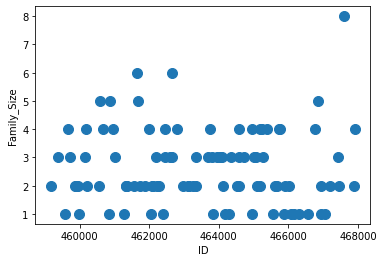

In [28]:
df.plot.scatter(x='ID',y='Family_Size',s=100);

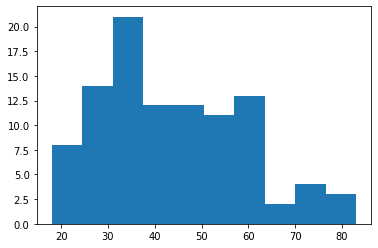

In [27]:
plt.hist(df["Age"])
plt.show()

Line graph: 


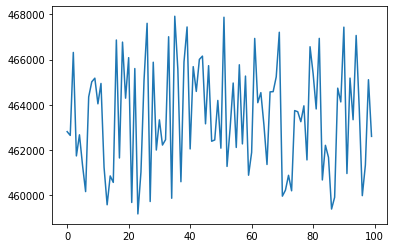

In [29]:
print("Line graph: ")
plt.plot(df.ID)
plt.show()

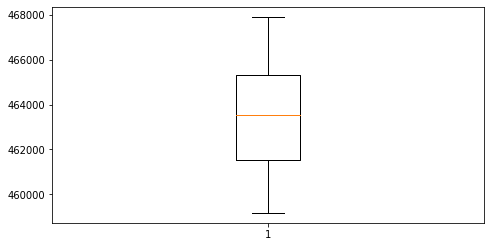

In [30]:
fig = plt.figure(figsize =(6,3))
ax= fig.add_axes([0,0,1,1])
bp=ax.boxplot(df.ID)
plt.show()

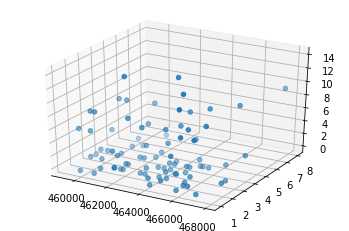

In [31]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df['ID'],df['Family_Size'],df['Work_Experience'])
plt.show()

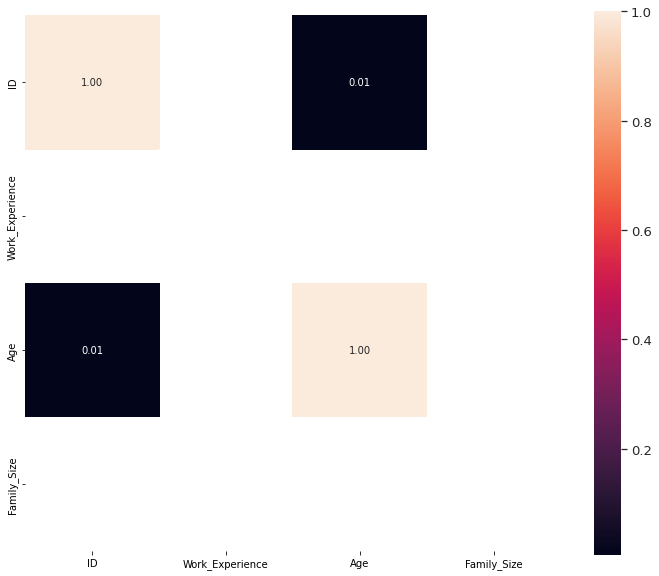

In [32]:
import numpy as np
import seaborn as sns
k=14
corrmat=df.corr()
cols=corrmat.nlargest(k,"ID")["ID"].index
cm =np.corrcoef(df[cols].values.T)
fig,ax =plt.subplots(figsize=(12,10))
sns.set(font_scale=1.2)
hm=sns.heatmap(cm, cbar=True, annot=True, square=True,fmt=".2f",annot_kws={"size":10},yticklabels=cols.values,xticklabels=cols.values)
plt.show()

In [33]:
A=np.array([[5,8,3], [1,5,6], [3,6,7]])
B=np.array([[9,4,5], [6,4,9], [1,3,5]])
print("Matrix A")
print(A)
print("Matrix B")
print(B)

Matrix A
[[5 8 3]
 [1 5 6]
 [3 6 7]]
Matrix B
[[9 4 5]
 [6 4 9]
 [1 3 5]]


In [34]:
C=np.add(A,B)
print(C)

[[14 12  8]
 [ 7  9 15]
 [ 4  9 12]]


In [35]:
D=np.subtract(A,B)
print(D)

[[-4  4 -2]
 [-5  1 -3]
 [ 2  3  2]]


In [36]:
E=np.matmul(A,B)
print(E)

[[ 96  61 112]
 [ 45  42  80]
 [ 70  57 104]]


In [37]:
F=np.transpose(A)
print("TRANSPOSE OF A:")
print(F)
G=np.transpose(B)
print("TRANSPOSE OF B:")
print(G)

TRANSPOSE OF A:
[[5 1 3]
 [8 5 6]
 [3 6 7]]
TRANSPOSE OF B:
[[9 6 1]
 [4 4 3]
 [5 9 5]]


In [38]:
eigenvalues, eigenvectors =np.linalg.eig(A @ B)
print(eigenvalues)
print(eigenvectors)

[227.691434    15.52815162  -1.21958563]
[[ 0.69292257  0.78189431  0.01270642]
 [ 0.42031008 -0.57065473 -0.88271586]
 [ 0.58583082 -0.25098698  0.46973531]]
